In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### 1. Answer Questions 1 through 5 of part 6 of the classwork. You can work right in the notebook from class if you wish, or create a new notebook (or paste it below). Please copy and paste each question into its own cell with answers below it.

In [2]:
l = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)', header=0)
world_gdp = l[1].iloc[3:194,1:3].reset_index(drop=True)
world_gdp.columns = ['Country', 'GDP']
world_gdp['Country'] = world_gdp['Country'].str.split('[').str[0]
world_gdp['GDP'] = world_gdp['GDP'].str.split('/').str[0].str.replace(',','')
world_gdp['GDP'] = world_gdp['GDP'].astype('float')
world_gdp['GDP_Log'] = np.log(world_gdp['GDP'])

#### 1. Plot the histogram, swarmplot, boxplot, and ECDF of the GDP Log. How does this histogram differ from the histogram we saw of the median age above? How does the ECDF differ from the ECDF we saw of the median age? What else can we tell about the distribution from these plots? Are there any outliers?

(array([ 1.,  7., 16., 22., 44., 40., 31., 18., 10.,  2.]),
 array([ 3.80666249,  5.10965318,  6.41264387,  7.71563456,  9.01862525,
        10.32161594, 11.62460663, 12.92759732, 14.23058801, 15.5335787 ,
        16.83656939]),
 <a list of 10 Patch objects>)

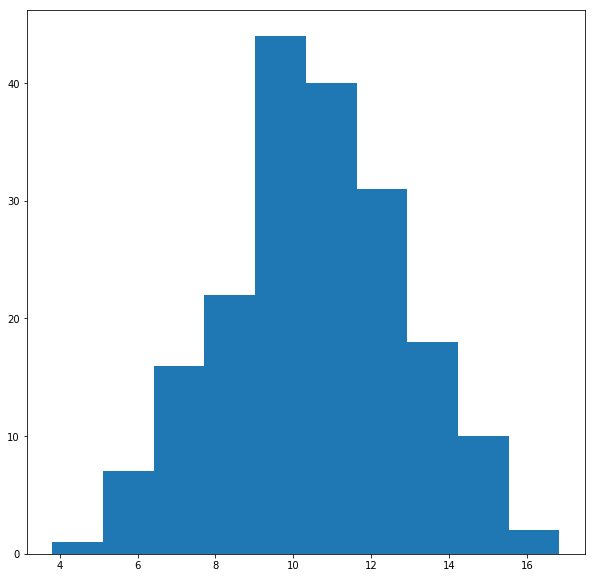

In [3]:
fig = plt.figure(figsize=(10,10))
plt.hist(world_gdp['GDP_Log'])

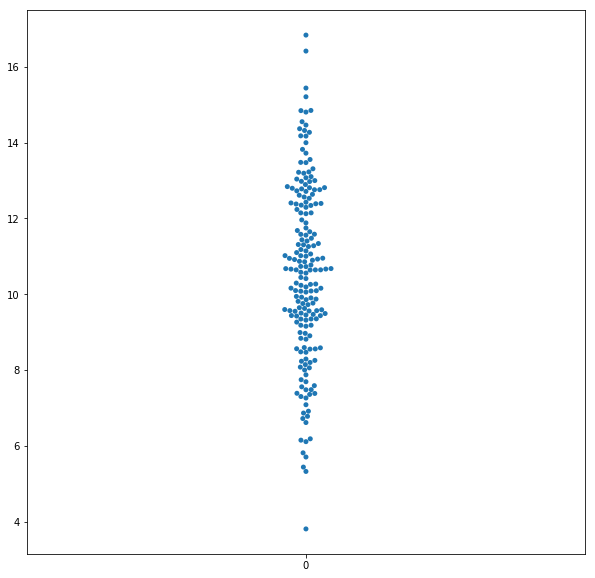

In [4]:
fig = plt.figure(figsize=(10,10))
sns.swarmplot(data=world_gdp['GDP_Log'])

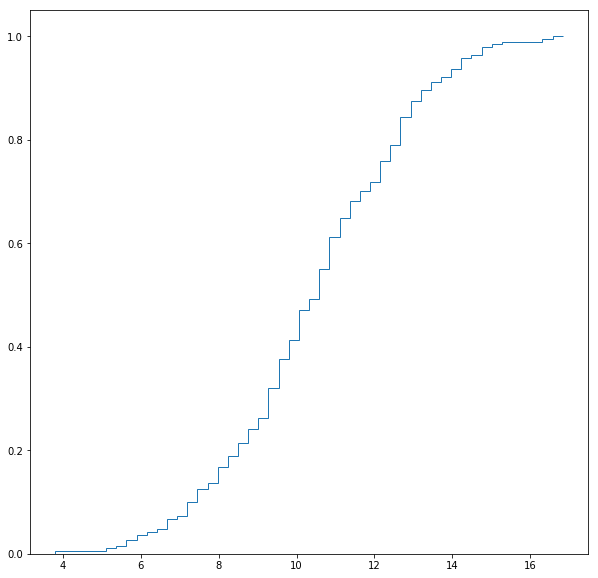

In [5]:
fig = plt.figure(figsize=(10,10))
n,bins,patches = plt.hist(world_gdp['GDP_Log'], cumulative=True, bins=50, density=True, histtype='step');
#This extra line removes the final line from the graph
patches[0].set_xy(patches[0].get_xy()[:-1])

{'boxes': [<matplotlib.lines.Line2D at 0x1293def60>],
 'caps': [<matplotlib.lines.Line2D at 0x1293dfcc0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1293e3160>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1293e1a58>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1293df240>,
  <matplotlib.lines.Line2D at 0x1293df748>]}

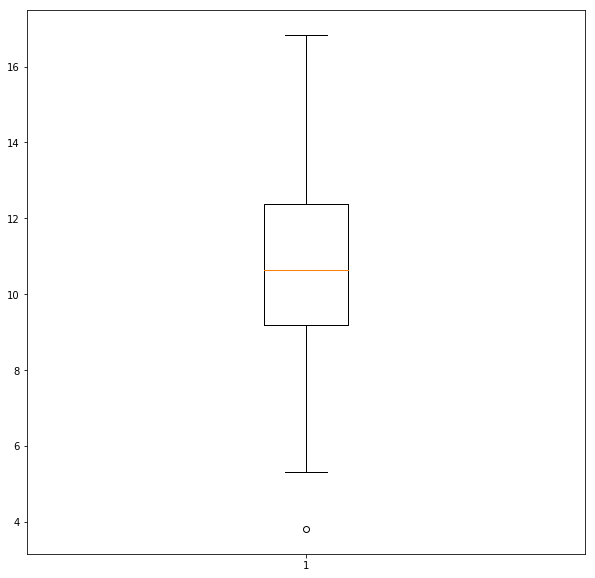

In [6]:
fig = plt.figure(figsize=(10,10))
plt.boxplot(world_gdp['GDP_Log'])

This histogram has a normal distribution, while the histogram we looked at during class has more of a uniform distribution. This is also seen in the ECDF, which is curved compared to the relatively straight ECDF of the countries' ages. There is one outlier on the lower end.

#### 2. Find the mean, median, variance, standard deviation, maximum, minimum, range, and Interquartile Range of the GDP Log.

In [7]:
np.mean(world_gdp['GDP_Log'])

10.566274390714232

In [8]:
np.median(world_gdp['GDP_Log'])

10.64144078072663

In [9]:
np.var(world_gdp['GDP_Log'])

5.460071918544747

In [10]:
np.std(world_gdp['GDP_Log'])

2.336679678206824

In [11]:
np.max(world_gdp['GDP_Log'])

16.836569389464273

In [12]:
np.min(world_gdp['GDP_Log'])

3.8066624897703196

In [13]:
np.max(world_gdp['GDP_Log']) - np.min(world_gdp['GDP_Log'])

13.029906899693954

In [14]:
np.percentile(world_gdp['GDP_Log'], 75) - np.percentile(world_gdp['GDP_Log'], 25)

3.2017418206787145

#### 3. Which country has the highest GDP? Which country has the lowest? Which countries are outliers? What constitutes the cutoff for an outlier in this case?

In [15]:
world_gdp[world_gdp['GDP_Log'] == np.max(world_gdp['GDP_Log'])]

,Country,GDP,GDP_Log
0,United States,20513000.0,16.836569


In [16]:
world_gdp[world_gdp['GDP_Log'] == np.min(world_gdp['GDP_Log'])]

,Country,GDP,GDP_Log
190,Tuvalu,45.0,3.806662


In [17]:
np.percentile(world_gdp['GDP_Log'], 75) + ((np.percentile(world_gdp['GDP_Log'], 75) - np.percentile(world_gdp['GDP_Log'], 25)) * 1.5)

17.185574940301578

In [18]:
np.percentile(world_gdp['GDP_Log'], 25) - ((np.percentile(world_gdp['GDP_Log'], 75) - np.percentile(world_gdp['GDP_Log'], 25)) * 1.5)

4.378607657586721

In [19]:
world_gdp[world_gdp['GDP_Log'] < np.percentile(world_gdp['GDP_Log'], 25) - ((np.percentile(world_gdp['GDP_Log'], 75) - np.percentile(world_gdp['GDP_Log'], 25)) * 1.5)]

,Country,GDP,GDP_Log
190,Tuvalu,45.0,3.806662


#### 4. Now let's join the continents file in and see what we can find.

In [20]:
continents = pd.read_csv('https://github.com/CSC217/spring_2019/raw/master/week02-descriptive_stats/continents.csv')
world_gdp_new = world_gdp.merge(continents, how='inner', left_on='Country', right_on='Country(or dependent territory)')
world_gdp_new = world_gdp_new[['Country', 'GDP_Log', 'Continent']]
world_gdp_new.head()

,Country,GDP_Log,Continent
0,United States,16.836569,North America
1,China,16.415030,Asia
2,Japan,15.438975,Asia
3,Germany,15.209064,Europe
4,United Kingdom,14.848303,Europe


#### 5. Plot the swarmplot, boxplot, and ECDF of the gropued GDP Log. Which continent has the highest mean GDP? Which continent has the highest median GDP? Which continent had the highest difference between its median GDP and mean GDP? What do you think accounts for that difference? Which continent has the highest variance? Which continent has the highest range? Do any of the continents have outliers, and if so, which countries are outliers?

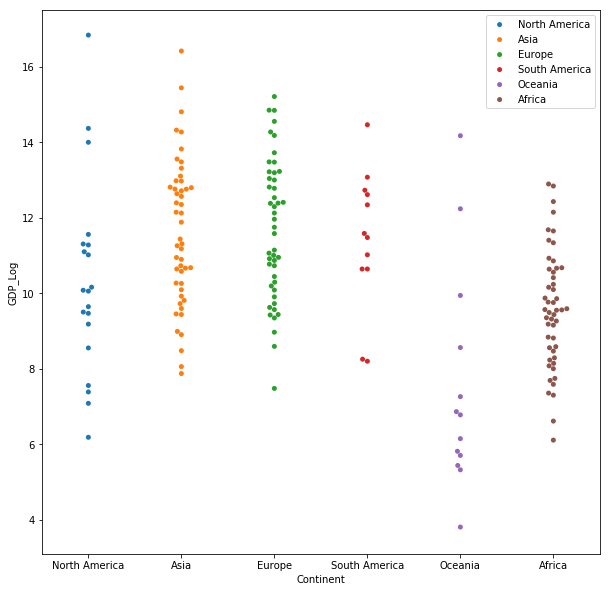

In [21]:
fig = plt.figure(figsize=(10,10))
sns.swarmplot(x='Continent', y='GDP_Log', data=world_gdp_new)
plt.gca().legend(world_gdp_new['Continent'].unique())

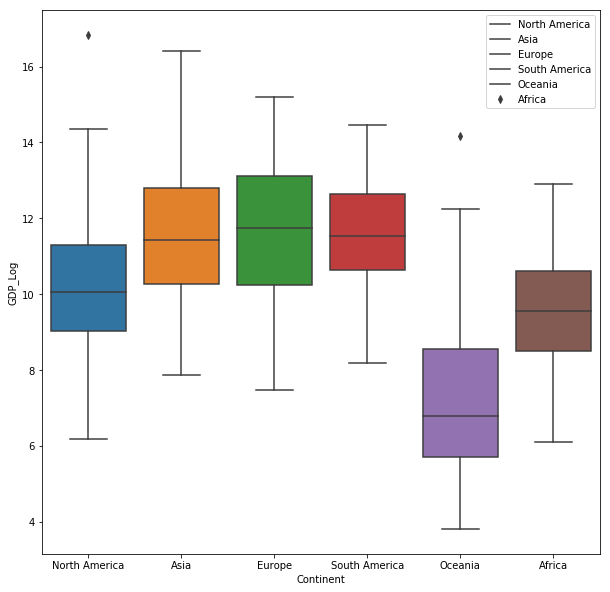

In [22]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(x='Continent', y='GDP_Log', data=world_gdp_new)
plt.gca().legend(world_gdp_new['Continent'].unique())

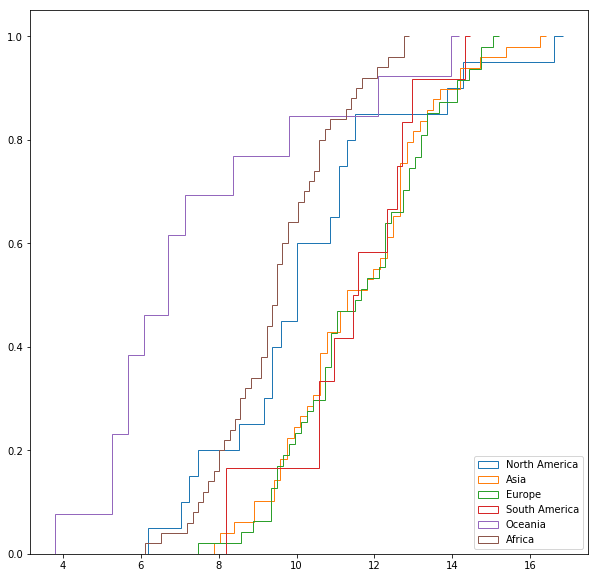

In [23]:
#Plot an ECDF
fig = plt.figure(figsize=(10,10))
for continent in world_gdp_new['Continent'].unique():
    n,bins,patches = plt.hist(world_gdp_new[world_gdp_new['Continent'] == continent]['GDP_Log'], cumulative=True, bins=50, density=True, histtype='step');
    #This extra line removes the final line from the graph
    patches[0].set_xy(patches[0].get_xy()[:-1])
plt.gca().legend(world_gdp_new['Continent'].unique(), loc='lower right')

In [24]:
world_gdp_new.groupby('Continent').mean()

,GDP_Log
Continent,
Africa,9.573513
Asia,11.623568
Europe,11.696649
North America,10.315005
Oceania,7.542000
South America,11.418801


In [25]:
world_gdp_new.groupby('Continent').median()

,GDP_Log
Continent,
Africa,9.553248
Asia,11.435007
Europe,11.747128
North America,10.067216
Oceania,6.777647
South America,11.529291


In [26]:
np.abs(world_gdp_new.groupby('Continent').median() - world_gdp_new.groupby('Continent').mean())

,GDP_Log
Continent,
Africa,0.020266
Asia,0.188561
Europe,0.050479
North America,0.247789
Oceania,0.764353
South America,0.110490


In [27]:
world_gdp_new.groupby('Continent').var()

,GDP_Log
Continent,
Africa,2.417245
Asia,3.736542
Europe,3.456089
North America,6.691030
Oceania,8.792366
South America,3.433723


In [28]:
world_gdp_new.groupby('Continent')['GDP_Log'].max() - world_gdp_new.groupby('Continent')['GDP_Log'].min()

Continent
Africa            6.783632
Asia              8.542575
Europe            7.730894
North America    10.652420
Oceania          10.364960
South America     6.263653
Name: GDP_Log, dtype: float64

Europe has the highest mean and median GDP. Oceania had the largest difference in its median and mean because it was right skewed and had an outlier on the high end. Oceania had the highest variance, while North America had the highest range.

In [29]:
for i in world_gdp_new['Continent'].unique():
    iqr = np.percentile(world_gdp_new[world_gdp_new['Continent'] == i]['GDP_Log'], 75) - np.percentile(world_gdp_new[world_gdp_new['Continent'] == i]['GDP_Log'], 25)
    print('high_outliers', i)
    high_cutoff = np.percentile(world_gdp_new[world_gdp_new['Continent'] == i]['GDP_Log'], 75) + (iqr * 1.5)
    print(world_gdp_new[(world_gdp_new['Continent'] == i) & (world_gdp_new['GDP_Log'] >= high_cutoff)])
    print('low outliers', i)
    low_cutoff = np.percentile(world_gdp_new[world_gdp_new['Continent'] == i]['GDP_Log'], 25) - (iqr * 1.5)
    print(world_gdp_new[(world_gdp_new['Continent'] == i) & (world_gdp_new['GDP_Log'] <= low_cutoff)])

high_outliers North America
         Country    GDP_Log      Continent
0  United States  16.836569  North America
low outliers North America
Empty DataFrame
Columns: [Country, GDP_Log, Continent]
Index: []
high_outliers Asia
Empty DataFrame
Columns: [Country, GDP_Log, Continent]
Index: []
low outliers Asia
Empty DataFrame
Columns: [Country, GDP_Log, Continent]
Index: []
high_outliers Europe
Empty DataFrame
Columns: [Country, GDP_Log, Continent]
Index: []
low outliers Europe
Empty DataFrame
Columns: [Country, GDP_Log, Continent]
Index: []
high_outliers South America
Empty DataFrame
Columns: [Country, GDP_Log, Continent]
Index: []
low outliers South America
Empty DataFrame
Columns: [Country, GDP_Log, Continent]
Index: []
high_outliers Oceania
      Country    GDP_Log Continent
14  Australia  14.171622   Oceania
low outliers Oceania
Empty DataFrame
Columns: [Country, GDP_Log, Continent]
Index: []
high_outliers Africa
Empty DataFrame
Columns: [Country, GDP_Log, Continent]
Index: []
low out

(array([1., 4., 3., 1., 1., 1., 0., 0., 1., 1.]),
 array([ 3.80666249,  4.84315847,  5.87965444,  6.91615042,  7.95264639,
         8.98914237, 10.02563834, 11.06213432, 12.09863029, 13.13512627,
        14.17162224]),
 <a list of 10 Patch objects>)

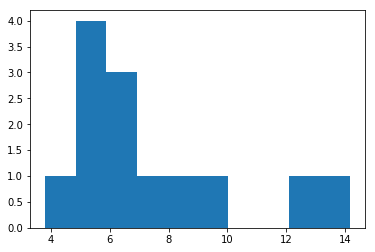

In [30]:
plt.hist(world_gdp_new[world_gdp_new['Continent'] == 'Oceania']['GDP_Log'])

(array([2., 2., 2., 6., 4., 1., 0., 2., 0., 1.]),
 array([ 6.18414889,  7.24939094,  8.31463299,  9.37987504, 10.44511709,
        11.51035914, 12.57560119, 13.64084324, 14.70608529, 15.77132734,
        16.83656939]),
 <a list of 10 Patch objects>)

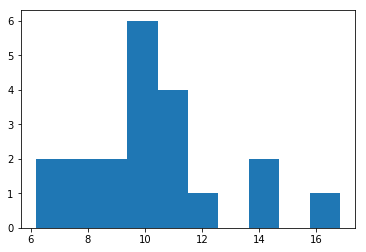

In [31]:
plt.hist(world_gdp_new[world_gdp_new['Continent'] == 'North America']['GDP_Log'])

#### 2. Answer Questions 1 through 10 from here below (please copy and paste each question into its own cell with answers below it). I've loaded in the code for you and cleaned it up a bit.

In [32]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')
df.columns = ['age', 'workingclass', 'fnlwgt', 'education', 'education-num', 'martial-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary']
df['salary'] = df['salary'].str.strip()
df['native-country'] = df['native-country'].str.strip()

#### 1. How many men and women (sex feature) are represented in this dataset?

In [33]:
df['sex'].value_counts()

 Male      21789
 Female    10771
Name: sex, dtype: int64

#### 2. What is the average age (age feature) of women?

In [34]:
df.groupby('sex')['age'].mean()

sex
 Female    36.858230
 Male      39.433567
Name: age, dtype: float64

#### 3. What is the percentage of German citizens (native-country feature)?

In [35]:
df['native-country'].value_counts(normalize=True)

United-States                 0.895854
Mexico                        0.019748
?                             0.017905
Philippines                   0.006081
Germany                       0.004208
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003256
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua                

#### 4-5. What are the mean and standard deviation of age for those who earn more than 50K per year (salary feature) and those who earn less than 50K per year?

In [36]:
df.groupby('salary')['age'].mean()

salary
<=50K    36.783648
>50K     44.249841
Name: age, dtype: float64

In [37]:
df.groupby('salary')['age'].std()

salary
<=50K    14.020365
>50K     10.519028
Name: age, dtype: float64

#### 6. Is it true that people who earn more than 50K have at least high school education? (education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters or Doctorate feature)

In [38]:
df[df['salary'] == '>50K']['education'].value_counts()

 Bachelors       2221
 HS-grad         1675
 Some-college    1387
 Masters          959
 Prof-school      423
 Assoc-voc        361
 Doctorate        306
 Assoc-acdm       265
 10th              62
 11th              60
 7th-8th           40
 12th              33
 9th               27
 5th-6th           16
 1st-4th            6
Name: education, dtype: int64

#### 7. Display age statistics for each race (race feature) and each gender (sex feature). Use groupby() and describe(). Find the maximum age of men of Amer-Indian-Eskimo race.

In [39]:
df.groupby('race')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
Amer-Indian-Eskimo,311.0,37.173633,12.447130,17.0,28.0,35.0,45.5,82.0
Asian-Pac-Islander,1039.0,37.746872,12.825133,17.0,28.0,36.0,45.0,90.0
Black,3124.0,37.767926,12.759290,17.0,28.0,36.0,46.0,90.0
Other,271.0,33.457565,11.538865,17.0,25.0,31.0,41.0,77.0
White,27815.0,38.769872,13.782554,17.0,28.0,37.0,48.0,90.0


#### 8. Among whom is the proportion of those who earn a lot (>50K) greater: married or single men (marital-status feature)? Consider as married those who have a marital-status starting with Married (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.

In [40]:
df[df['salary'] == '>50K']['martial-status'].value_counts()

 Married-civ-spouse       6692
 Never-married             491
 Divorced                  463
 Widowed                    85
 Separated                  66
 Married-spouse-absent      34
 Married-AF-spouse          10
Name: martial-status, dtype: int64

#### 9. What is the maximum number of hours a person works per week (hours-per-week feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?

In [41]:
df[df['hours-per-week'] == df['hours-per-week'].max()].shape

(85, 15)

In [42]:
df[df['hours-per-week'] == df['hours-per-week'].max()]['salary'].value_counts(normalize=True)

<=50K    0.705882
>50K     0.294118
Name: salary, dtype: float64

#### 10. Count the average time of work (hours-per-week) for those who earn a little and a lot (salary) for each country (native-country). What will these be for Japan?

In [43]:
df[df['native-country'] == 'Japan'].groupby(['native-country', 'salary'])['hours-per-week'].mean()

native-country  salary
Japan           <=50K     41.000000
                >50K      47.958333
Name: hours-per-week, dtype: float64